In [3]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import math
from PIL import Image

import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

TensorFlow version: 2.15.0


In [11]:
# ВЫЗОВ МОИХ ФУНКЦИЙ ДЛЯ РАБОТЫ С ДАТАСЕТАМИ
from MY_FUNCTIONS import DATASET_FUNCTIONS as TFF

In [12]:
train_dataset_path = "C:\\WORK_DIRECTORY\\7_СЕМ\Курсовая работа 7 сем\\NW_for_Transfer_Equation\\DATASETS\\DATASET_1\\TRAIN\\"
test_dataset_path = "C:\\WORK_DIRECTORY\\7_СЕМ\Курсовая работа 7 сем\\NW_for_Transfer_Equation\\DATASETS\\DATASET_1\\TEST\\"


In [13]:
train_dataset = TFF.create_dataset_from_directory(train_dataset_path)
test1_dataset = TFF.create_dataset_from_directory(test_dataset_path)

In [14]:
len(train_dataset)

200

In [15]:
for image, label in train_dataset.take(train_dataset.__sizeof__()):
    print("Изображение shape:", image.shape)
    print("Метка:", label.numpy())

Изображение shape: (1, 128, 128, 1)
Метка: [-0.1]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.2]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.3]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.4]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.5]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.6]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.7]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.8]
Изображение shape: (1, 128, 128, 1)
Метка: [-0.9]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.1]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.2]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.3]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.4]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.5]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.6]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.7]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.8]
Изображение shape: (1, 128, 128, 1)
Метка: [-1.9]
Изображение shape: (1, 128, 128, 1)
Метка: [-10.]
И

In [10]:
# TFF.show_all_images_in_grid(train_dataset, num_cols=5)

In [66]:
# ### ПОЛНОСВЯЗНАЯ СЕТЬ (2 скрытых слоя) ### 
# 
# from tensorflow.keras import layers, models
# 
# # Определяем параметры входных данных
# input_shape = (128, 128, 1)  # 128x128 пикс, 1 канал (RGB) 
# 
# # Создание трёхслойной модели персептрона
# model = models.Sequential()
# 
# # Входной слой (преобразование изображения в плоский вектор)
# model.add(layers.Flatten(input_shape=input_shape))
# 
# # Первый скрытый слой с 128 нейронами и активацией ReLU
# model.add(layers.Dense(1024, activation='relu'))
# 
# 
# # Выходной слой с одним нейроном для регрессии (непрерывное значение)
# model.add(layers.Dense(1))
# 
# # Компиляция модели с функцией потерь для регрессии и оптимизатором Adam
# model.compile(optimizer='adam', loss='mse')
# 
# # Вывод структуры модели
# model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 16384)             0         
                                                                 
 dense_30 (Dense)            (None, 1024)              16778240  
                                                                 
 dense_31 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 16779265 (64.01 MB)
Trainable params: 16779265 (64.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:


# Определяем параметры входных данных
input_shape = (128, 128, 1)  # 64x64 пикселя, 1 канал (черно-белые изображения)

# Создание модели
model = models.Sequential()

# Первый сверточный слой
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))  # Подвыборка

# Второй сверточный слой
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Третий сверточный слой
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Преобразование многомерных данных в плоский вектор
model.add(layers.Flatten())

# Полносвязный слой
model.add(layers.Dense(128, activation='relu'))

# Выходной слой с одним нейроном для регрессии
model.add(layers.Dense(1))

# Компиляция модели
model.compile(optimizer='adam', loss='mse')

# Вывод структуры модели
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 128)     

In [111]:
### ОБУЧЕНИЕ СЕТИ ###


# Определение пути для сохранения модели
checkpoint_filepath = 'SAVED_MODELS\\best_CNN_dataset1_1.h5'

# Настройка коллбека ModelCheckpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,  # путь для сохранения модели
    monitor='val_loss',            # метрика для мониторинга (здесь - валидационная функция потерь)
    save_best_only=True,           # сохранять только лучшую модель
    save_weights_only=False,       # сохранять не только веса, но и всю модель
    mode='min',                    # искать минимальное значение метрики
    verbose=1                      # выводить информацию о сохранении
)

history = model.fit(train_dataset,
                    epochs=100,
                    batch_size=1,
                    validation_data=train_dataset,
                    callbacks=[checkpoint])


Epoch 1/100
200/200 [==============================] - ETA: 0s - loss: 1.9290
Epoch 1: val_loss improved from inf to 133.73238, saving model to SAVED_MODELS\best_CNN_dataset1_1.h5
200/200 [==============================] - 12s 52ms/step - loss: 1.9290 - val_loss: 133.7324
Epoch 2/100
200/200 [==============================] - ETA: 0s - loss: 3.0395
Epoch 2: val_loss improved from 133.73238 to 120.41713, saving model to SAVED_MODELS\best_CNN_dataset1_1.h5
200/200 [==============================] - 11s 53ms/step - loss: 3.0395 - val_loss: 120.4171
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 2.6523
Epoch 3: val_loss improved from 120.41713 to 71.24050, saving model to SAVED_MODELS\best_CNN_dataset1_1.h5
200/200 [==============================] - 9s 44ms/step - loss: 2.6523 - val_loss: 71.2405
Epoch 4/100
200/200 [==============================] - ETA: 0s - loss: 2.1704
Epoch 4: val_loss improved from 71.24050 to 54.98598, saving model to SAVED_MODELS\best_CNN_da

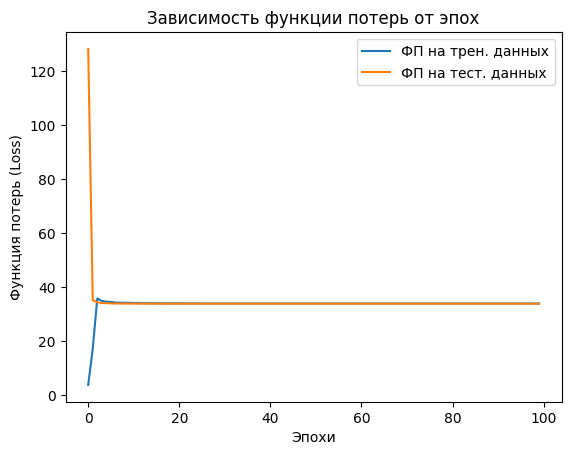

In [102]:
# Построение графика функции потерь
plt.plot(history.history['loss'], label='ФП на трен. данных')
plt.plot(history.history['val_loss'], label='ФП на тест. данных')
plt.title('Зависимость функции потерь от эпох')
plt.xlabel('Эпохи')
plt.ylabel('Функция потерь (Loss)')
plt.legend()
plt.show()

In [106]:
new_model = tf.keras.models.load_model(checkpoint_filepath)

# new_model = model

In [107]:
def load_and_preprocess_image(image_path):
    img = tf.io.read_file(image_path)  # Чтение файла изображения
    img = tf.image.decode_image(img, channels=1)  # Автоопределение формата
    img = tf.image.resize(img, [128, 128])  # Изменение размера
    img = tf.image.convert_image_dtype(img, tf.float32)  # Преобразование в тип float32
    img = tf.expand_dims(img, axis=0)  # Создание батча из одного изображения
    return img

# Пример пути к новому изображению
img_path = "C:\\WORK_DIRECTORY\\7_СЕМ\Курсовая работа 7 сем\\NW_for_Transfer_Equation\\DATASETS\\DATASET_1\\TRAIN\\1..png"

img = load_and_preprocess_image(img_path)
predictions = new_model.predict(img)
print(predictions)

1/1 [==============================] - 0s 110ms/step
[[7.8870316]]


1/1 [==============================] - 0s 31ms/step


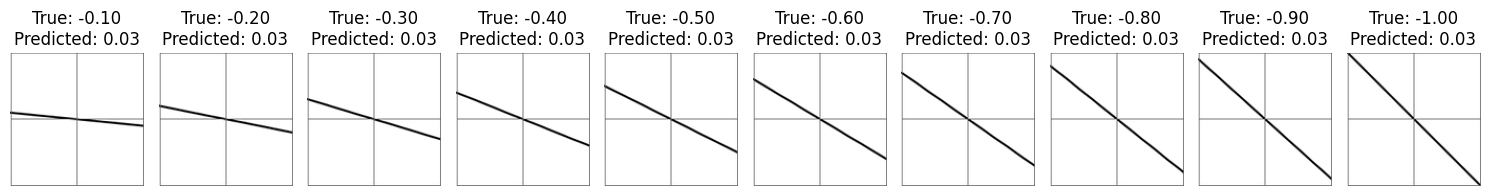

In [108]:
import matplotlib.pyplot as plt

# Использование функции
TFF.plot_predictions(train_dataset, new_model, num_images=10)

1/1 [==============================] - 0s 36ms/step


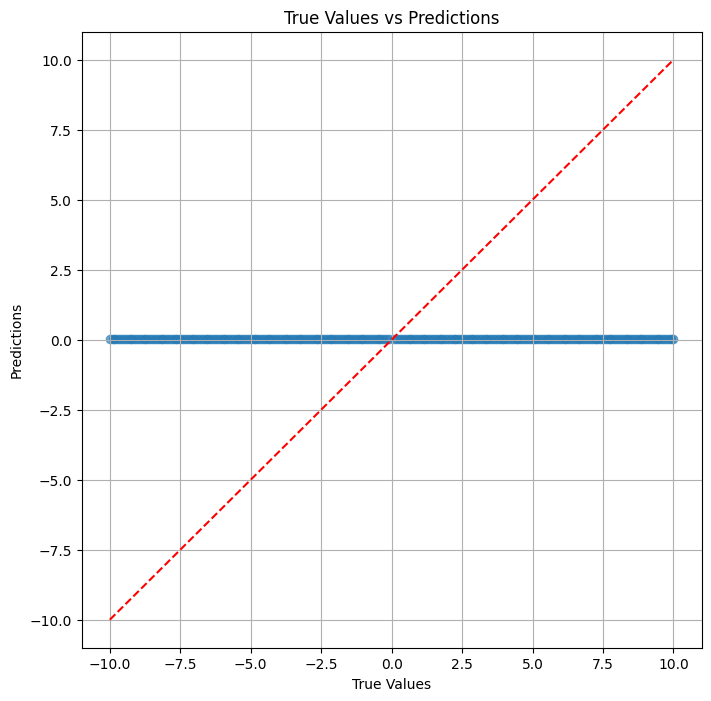

1/1 [==============================] - 0s 32ms/step


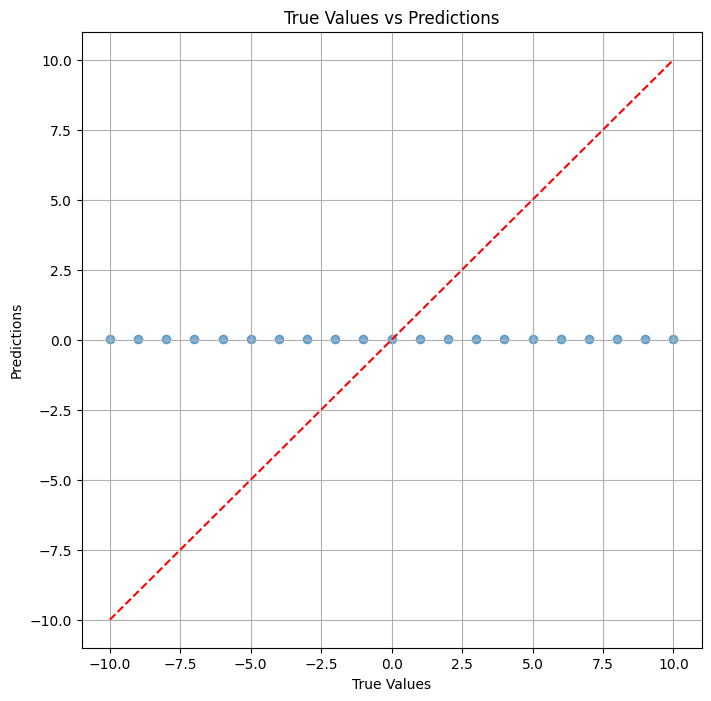

In [109]:
TFF.plot_prediction_vs_true(train_dataset, new_model)
TFF.plot_prediction_vs_true(test1_dataset, new_model)